# Trabalho 2 - Inteligência Artificial
- **Guilherme Silveira Gomes Brotto**
- **Matrícula: 2021101641**
- **Ciência da Computação**
- **Modalidade 2**

### Imports necessários

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from geneticAlgorithm import GeneticAlgorithm
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
import seaborn as sns
import pandas as pd



In [29]:
!pip install tqdm

### Executar o agente inteligente para as seguintes configurações:

In [ ]:
genAlg = GeneticAlgorithm(solution_size= 25, population_size= 100, 
                            elitism_percent= 0.1, cross_ratio= 0.8, 
                            mutation_ratio= 0.2, max_iterations = 1000,
                            max_time= 10000)

best_solution, _, best_values = genAlg.run()    

my_result = genAlg.test(best_solution= best_solution)

### Plotando o valor do melhor indivíduo de cada iteração.

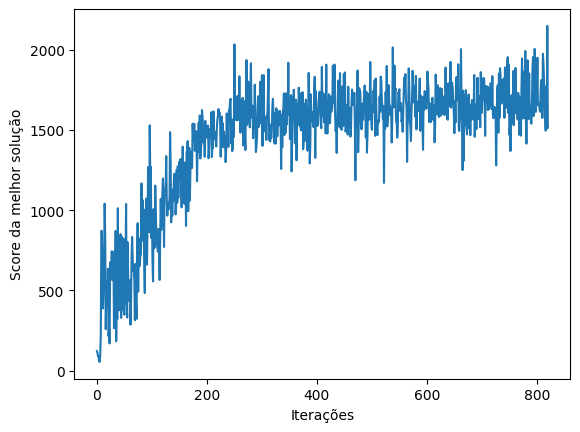

In [13]:
plt.plot(range(0, len(best_values)), best_values)
plt.xlabel('Iterações')
plt.ylabel('Score da melhor solução')
plt.savefig('best_solutions_per_Iteration.pdf')

### Testes estatísticos entre a minha solução e a do professor 

In [ ]:
prof_result = [1214.0, 759.5, 1164.25, 977.25, 1201.0, 930.0, 1427.75,
799.5, 1006.25, 783.5, 728.5, 419.25, 1389.5, 730.0, 1306.25, 675.5,
1359.5, 1000.25, 1284.5, 1350.0, 751.0, 1418.75, 1276.5, 1645.75, 860.0,
745.5, 1426.25, 783.5, 1149.75, 1482.25]

In [28]:
rows = [f'Treinamento {i}' for i in range(1, 31)]
table = pd.DataFrame(index=[rows])
table['Meus resultados'] = my_result
table['Resultados do professor'] = prof_result
table

,Meus resultados,Resultados do professor
Treinamento 1,1882.75,1214.00
Treinamento 2,1527.75,759.50
Treinamento 3,2100.25,1164.25
Treinamento 4,1567.75,977.25
Treinamento 5,1414.50,1201.00
Treinamento 6,1670.00,930.00
Treinamento 7,1593.50,1427.75
Treinamento 8,1734.50,799.50
Treinamento 9,1892.75,1006.25
Treinamento 10,1614.25,783.50


In [24]:
table.describe

,Meus resultados,Resultados do professor
count,30.000000,30.000000
mean,1697.816667,1068.183333
std,218.448289,309.233089
min,1414.500000,419.250000
25%,1534.875000,783.500000
50%,1627.125000,1078.000000
75%,1841.812500,1339.062500
max,2124.750000,1645.750000


In [ ]:
wx = wilcoxon(prof_result, my_result, method='approx')[1]

t_test = ttest_ind(prof_result, my_result)[1]

print(f'Teste de Wilcoxon: {wx:.6f}, Teste t: {t_test:.6f}')

Teste de Wilcoxon: 0.000002, Teste t: 0.000000


### Boxplot dos resultados

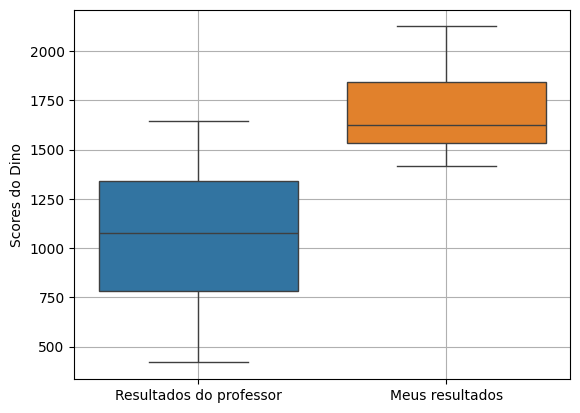

In [14]:
boxplot = pd.DataFrame()
boxplot['Resultados do professor'] = prof_result
boxplot['Meus resultados'] = my_result

sns.boxplot(boxplot)
plt.ylabel('Scores do Dino')
plt.grid()